In [77]:
import cv2
import matplotlib.pyplot as plt
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import matplotlib.pyplot as plt
import numpy as np


In [78]:
coordinates = []
def click_event(event, x, y, flags, params): 

	global coordinates

	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		coordinates.append((x, y))

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
		cv2.circle(img, (x,y), 5, (0,255,0), 2)
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font, 
					1, (100, 255, 0), 2) 
		cv2.imshow('image', img) 

	# checking for right mouse clicks	 
	if event==cv2.EVENT_RBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		coordinates.append((x, y))

		font = cv2.FONT_HERSHEY_SIMPLEX 
		b = img[y, x, 0] 
		g = img[y, x, 1] 
		r = img[y, x, 2] 

		cv2.circle(img, (x,y), 5, (0,255,0), -1)
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r), 
					(x,y), font, 1, 
					(255, 255, 0), 2) 
		cv2.imshow('image', img)

In [79]:
if __name__=="__main__": 

	# reading the image 
	img = cv2.imread('car.jpg', 1) 

	img = cv2.resize(img, (780, 540), 
               interpolation = cv2.INTER_LINEAR)

	# displaying the image 

	#img = cv2.resize(img, (1900,1000))
	cv2.imshow('image', img) 

	
	cv2.setMouseCallback('image', click_event) 
	
	cv2.waitKey(0) 

	# close the window 
	cv2.destroyAllWindows() 

336   376


In [80]:
print(coordinates)

[(336, 376)]


In [81]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

MODEL_TYPE = "vit_h"

In [82]:
sam = sam_model_registry[MODEL_TYPE](checkpoint=r"C:\Users\rinsh\OneDrive\Desktop\candy\candyprog\sam\sam_vit_h_4b8939.pth")

In [83]:
predictor = SamPredictor(sam)

In [84]:

hwc = np.array(img)
hwc

array([[[164, 217, 248],
        [165, 218, 249],
        [158, 211, 244],
        ...,
        [142, 132, 114],
        [ 57,  78,  62],
        [ 30,  73,  74]],

       [[156, 210, 243],
        [151, 204, 237],
        [142, 195, 228],
        ...,
        [143, 134, 114],
        [ 63,  90,  73],
        [ 30,  63,  66]],

       [[162, 216, 247],
        [156, 210, 242],
        [139, 192, 223],
        ...,
        [144, 130, 111],
        [ 59,  81,  67],
        [ 27,  59,  65]],

       ...,

       [[ 78,  64,  59],
        [ 85,  76,  67],
        [ 89,  79,  71],
        ...,
        [ 56,  51,  48],
        [ 58,  53,  50],
        [ 58,  54,  48]],

       [[ 82,  73,  64],
        [ 85,  74,  66],
        [ 89,  79,  69],
        ...,
        [ 53,  48,  45],
        [ 55,  52,  47],
        [ 57,  53,  48]],

       [[ 80,  68,  62],
        [ 91,  81,  74],
        [ 84,  72,  64],
        ...,
        [ 57,  53,  48],
        [ 60,  57,  49],
        [ 58,  55,  47]]

In [85]:
def show_points(points, labels, ax=None):
    if ax is None:
        ax = plt.gca()

    for point, label in zip(points, labels):
        ax.scatter(point[0], point[1], label=str(label))

    ax.legend()

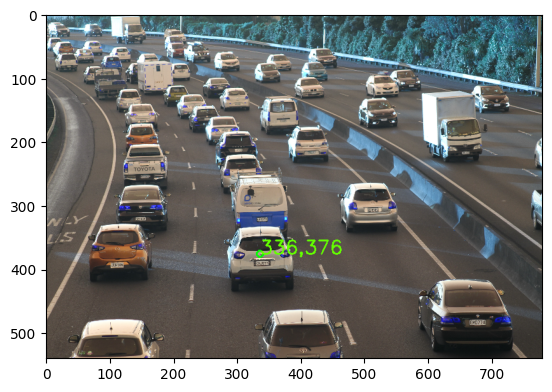

In [86]:
input_point = np.array([list(coordinates[0])])
inputlabel = np.array([1])
plt.imshow(hwc)

In [87]:
predictor.set_image(hwc)

In [88]:
masks, scores, logits = predictor.predict(point_coords = input_point, point_labels = inputlabel, multimask_output = True)

In [89]:
def show_mask(mask, ax=None, alpha=0.5):
    if ax is None:
        ax = plt.gca()
    ax.imshow(mask, alpha=alpha, cmap='viridis')

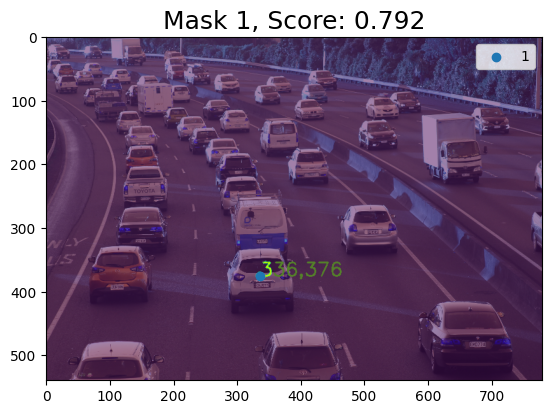

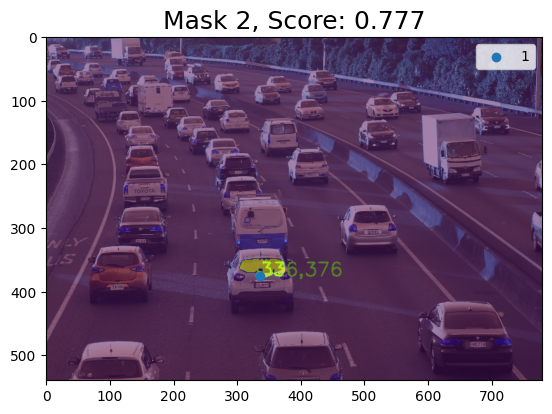

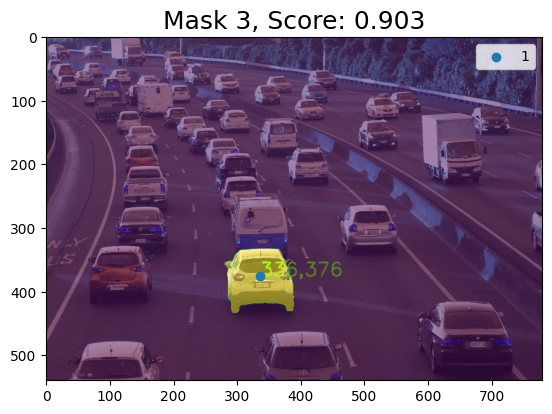

In [90]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.imshow(hwc)
    show_mask(mask, plt.gca())

    show_points(input_point, inputlabel, plt.gca())

    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize= 18)

    plt.show()

In [91]:
mask_final = masks[-1].astype('uint8')
mask_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [97]:
contours, _ = cv2.findContours((mask_final).astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours

(array([[[348, 333]],
 
        [[347, 334]],
 
        [[322, 334]],
 
        [[321, 335]],
 
        [[306, 335]],
 
        [[301, 340]],
 
        [[300, 340]],
 
        [[297, 343]],
 
        [[297, 344]],
 
        [[296, 345]],
 
        [[296, 346]],
 
        [[295, 347]],
 
        [[295, 349]],
 
        [[294, 350]],
 
        [[294, 351]],
 
        [[292, 353]],
 
        [[287, 353]],
 
        [[286, 354]],
 
        [[283, 354]],
 
        [[281, 356]],
 
        [[281, 358]],
 
        [[282, 359]],
 
        [[282, 360]],
 
        [[284, 362]],
 
        [[285, 362]],
 
        [[286, 363]],
 
        [[286, 370]],
 
        [[285, 371]],
 
        [[285, 376]],
 
        [[286, 377]],
 
        [[286, 408]],
 
        [[287, 409]],
 
        [[287, 412]],
 
        [[290, 415]],
 
        [[290, 417]],
 
        [[291, 418]],
 
        [[291, 430]],
 
        [[292, 431]],
 
        [[292, 432]],
 
        [[293, 433]],
 
        [[293, 434]],
 
        [[300, 4

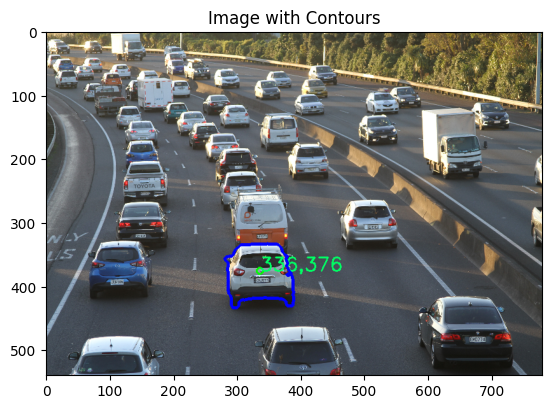

In [96]:
cv2.drawContours(img, contours, -1, (255, 0, 0), 3)  

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.show()

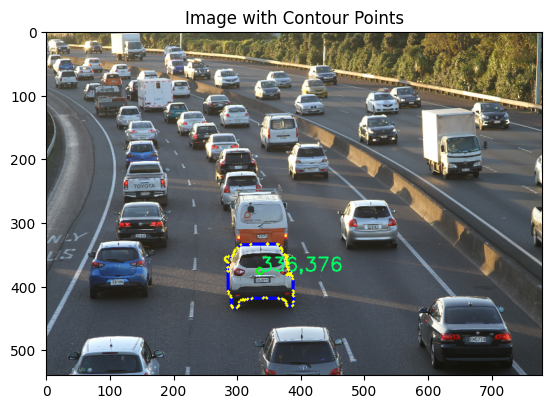

In [98]:
for contour in contours:
    for point in contour:
        cv2.circle(img, tuple(point[0]), 2, (0, 255, 255), -1)  # Green color, radius 2

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Contour Points')
plt.show()